In [6]:
import numpy
import random
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import datetime
from datetime import date
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from PIL import Image
import pandas
from sklearn.linear_model import LinearRegression, LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
import seaborn
import scipy
from scipy import stats
from scipy.stats import poisson, ttest_ind
from scipy import linalg
import xarray as xr
import os
import netCDF4
import cftime
import warnings

In [7]:
# Create List of Models
Model_List = ['MPIESM12', #'MPIESM11', 'IPSLCM5A', 'HadGEM2ES', 
              'HadCM3L', 'GISSE2R', 'FAMOUS', 'ECHAM5MPIOM', \
'CNRMCM61', 'CESM104', 'CCSM3']

In [8]:
# Define Directory
#Diri = "/Users/angelinependergrass/Documents/github/Long_Run_MIP_dPdT/Data/"
Diri = "data/processed/"

#
# Get Files
#Precip_Files = os.listdir(Diri+"Net_CDF/")
#print (Precip_Files)
Temp_Files = os.listdir(Diri+"CSV/")
print (Temp_Files)

['Temp_Control.csv', 'Temp_Anom.csv']


In [9]:
var = "rsds"

In [10]:
# Create Hydrological Sensitivity Dictionary
flux_Sensi_Dict = {"MPIESM12": [],# "MPIESM11": [], "IPSLCM5A": [], "HadGEM2ES": [], 
             "HadCM3L": [], "GISSE2R": [], \
"FAMOUS": [], "ECHAM5MPIOM": [], "CNRMCM61": [], "CESM104": [], "CCSM3": []}
i = 0
for Model in Model_List:
    flux_Sensi_Dict[Model] = i
    i += 1


In [11]:
for Model in Model_List:
    # read in netcdf where we saved the data
    Filename_1 = Diri+"fluxdict/"+var+"_Sensi_"+Model+".nc"
    ds = xr.open_dataset(Filename_1)
    flux_Sensi_Dict[Model] = ds.__xarray_dataarray_variable__
  
    # Create Array of Longitude and Latitudes
    Longitude = numpy.array(ds.Lon)
    Latitude = numpy.array(ds.Lat)  
    Time_Period = ["1-20 Years", "21-150 Years", "151-1000 Years"]

    i += 1

In [12]:
flux_Sensi_Dict

{'MPIESM12': <xarray.DataArray '__xarray_dataarray_variable__' (Latitude: 72,
                                                    Longitude: 144,
                                                    Time Period: 3)> Size: 249kB
 [31104 values with dtype=float64]
 Coordinates:
     Lat      (Latitude) float64 576B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
     Lon      (Longitude) float64 1kB 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
     Period   (Time Period) <U14 168B ...
 Dimensions without coordinates: Latitude, Longitude, Time Period,
 'HadCM3L': <xarray.DataArray '__xarray_dataarray_variable__' (Latitude: 72,
                                                    Longitude: 144,
                                                    Time Period: 3)> Size: 249kB
 [31104 values with dtype=float64]
 Coordinates:
     Lat      (Latitude) float64 576B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
     Lon      (Longitude) float64 1kB 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
     Period   (Tim

In [13]:
flux_DA = xr.concat([flux_Sensi_Dict[Model] for Model in Model_List], 'Model')

In [14]:
flux_Sensi_Median = flux_DA.median(dim='Model')

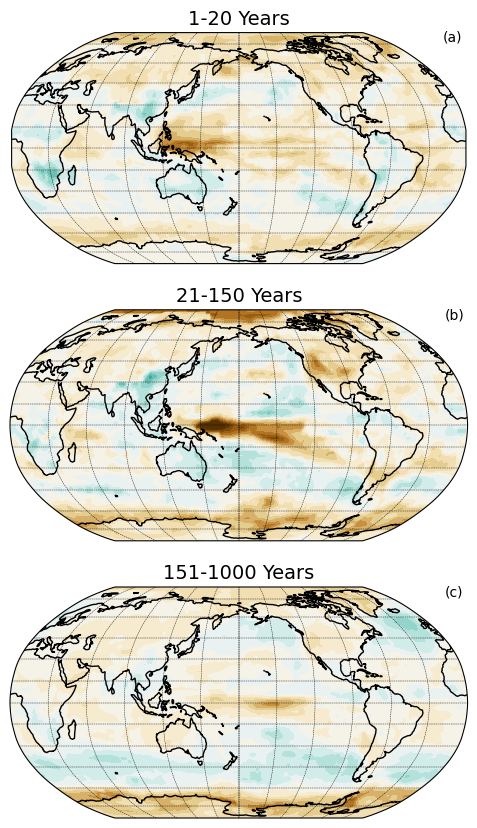

In [22]:
# Plot Contour Map of Intermodel Median Hydrological Sensitivity
def Map_Plotting_Median(Period):
# Create Figure
#    Fig = pyplot.figure(figsize=(15, 8))
#
# Define Axis
#    Axis = Fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
#
# Define Colour Levels
    Colour_Levels = numpy.arange(-10,11,1)
#
# Plot Colour Contour For 1-20 Years Slope
    if Period == "1-20 Years":
        Period_Code = 0
    if Period == "21-150 Years":
        Period_Code = 1
    if Period == "151-1000 Years":
        Period_Code = 2
    flux_Sensi_Data_Median = flux_Sensi_Median[:,:,Period_Code]
#    Hydro_Sensi_Data = Hydro_Sensi_Mean[:,:,Period_Code]
#    Colour_Plot = Axis.contourf(Hydro_Sensi_Data.Lon, Hydro_Sensi_Data.Lat, Hydro_Sensi_Data_Median, \
    Colour_Plot = Axis.contourf(flux_Sensi_Data_Median.Lon, flux_Sensi_Data_Median.Lat, flux_Sensi_Data_Median, \
    cmap='BrBG', levels=Colour_Levels, extend="both", transform=ccrs.PlateCarree())
#
# Draw Coastlines
    Axis.coastlines()
#
# Set Axes Labels
    x_Axis = numpy.arange(-180,210,30)
    y_Axis = numpy.arange(-90,105,15)
#
# Add a Rectangular Line Grid to the Interior of the Plot
    Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='black', linestyle='--')
    Gridline.xlocator = mticker.FixedLocator(x_Axis)
    Gridline.ylocator = mticker.FixedLocator(y_Axis)
#
# Create Colour Bar
#    Colour_Bar = pyplot.colorbar(Colour_Plot, shrink=0.6)
#    if Period_Code == 2:
#        Cax = Axis.inset_axes([0.1, -0.18, 0.8, 0.08], transform=Axis.transAxes)
#        Fig.colorbar(Colour_Plot, ax=Axis, cax=Cax, orientation='horizontal')
#
# Add Title
    Title = Period
    pyplot.title(Title, fontsize=14)
#
# Add Alphabet Label
    Alphabets = ["a", "b", "c"]
    Axis.text(0.95, 0.98, str("("+Alphabets[Period_Code]+")"), ha='left', va='center', \
    transform=Axis.transAxes, fontdict={'size':10},color='black')
#
# Output Figure
    if Period_Code == 0:
        Fig_Name = "Median_flux_Sensi_Map_1_20"
    if Period_Code == 1:
        Fig_Name = "Median_flux_Sensi_Map_21_150"
    if Period_Code == 2:
        Fig_Name = "Median_flux_Sensi_Map_151_1000"
#    Fig.savefig(Fig_Name+'.png', bbox_inches='tight')
#
#
# Create Figs
Fig = pyplot.figure(figsize=(7.48,10.20))
Count = 0
for i in range(3):
#
# Plot Contour Map of Intermodel Median Hydrological Sensitivity
    Count += 1
    Axis = Fig.add_subplot(3,1, Count, projection=ccrs.Robinson(central_longitude=180))
    if Count == 1:
        Map_Plotting_Median("1-20 Years")
    if Count == 2:
        Map_Plotting_Median("21-150 Years")
    if Count == 3:
        Map_Plotting_Median("151-1000 Years")
#        Colour_Bar = pyplot.colorbar(Colour_Plot, shrink=0.6, orientation="horizontal")
#    Fig.savefig('Median_Hydro_Sensi_Maps.png', bbox_inches='tight')
#    Fig.savefig('FIGURE_4.eps', bbox_inches='tight')

In [16]:
# Calculate Difference Between Timescales of Intermodel Median of Hydrological Sensitivities
flux_Sensi_Median_Diff = numpy.zeros((len(flux_Sensi_Dict[Model]), len(flux_Sensi_Dict[Model][0]), 2))
for i in range(len(flux_Sensi_Dict[Model])):
    for j in range(len(flux_Sensi_Dict[Model][0])):
        flux_Sensi_Median_Diff[i][j][0] = flux_Sensi_Median[i][j][1] - flux_Sensi_Median[i][j][0]
        flux_Sensi_Median_Diff[i][j][1] = flux_Sensi_Median[i][j][2] - flux_Sensi_Median[i][j][1]
#print (Hydro_Sensi_Median_Diff)

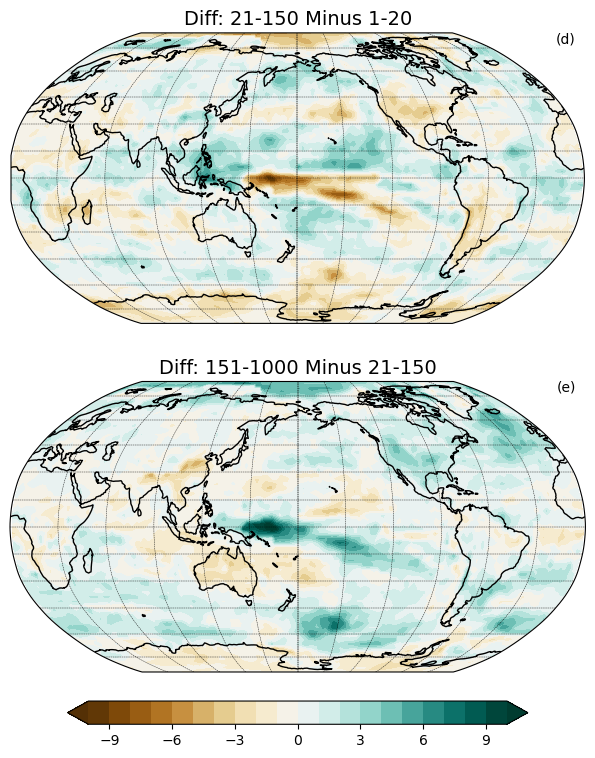

In [23]:
# Plot Contour Map of Intermodel Median Hydrological Sensitivity
def Map_Plotting_Median_Diff(Period):
# Create Figure
#    Fig = pyplot.figure(figsize=(15, 8))
#
# Define Axis
#    Axis = Fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180))
#
# Define Colour Levels
    Colour_Levels = numpy.arange(-10,11,1)
#
# Plot Colour Contour For 1-20 Years Slope
    if Period == "Diff: 21-150 Minus 1-20":
        Period_Code = 0
    if Period == "Diff: 151-1000 Minus 21-150":
        Period_Code = 1
    flux_Sensi_Data_Median_Diff = flux_Sensi_Median_Diff[:,:,Period_Code]
#    flux_Sensi_Data = flux_Sensi_Mean[:,:,Period_Code]
#    Colour_Plot = Axis.contourf(flux_Sensi_Data.Lon, flux_Sensi_Data.Lat, flux_Sensi_Data_Median_Diff, \
    Colour_Plot = Axis.contourf(ds.Lon, ds.Lat, flux_Sensi_Data_Median_Diff, \
    cmap='BrBG', levels=Colour_Levels, extend="both", transform=ccrs.PlateCarree())
#
# Draw Coastlines
    Axis.coastlines()
#
# Set Axes Labels
    x_Axis = numpy.arange(-180,210,30)
    y_Axis = numpy.arange(-90,105,15)
#
# Add a Rectangular Line Grid to the Interior of the Plot
    Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.3, color='black', linestyle='--')
    Gridline.xlocator = mticker.FixedLocator(x_Axis)
    Gridline.ylocator = mticker.FixedLocator(y_Axis)
#
# Create Colour Bar
#    Colour_Bar = pyplot.colorbar(Colour_Plot, shrink=0.6)
    if Period_Code == 1:
        Cax = Axis.inset_axes([0.1, -0.18, 0.8, 0.08], transform=Axis.transAxes)
        Fig.colorbar(Colour_Plot, ax=Axis, cax=Cax, orientation='horizontal')
#
# Add Title
    Title = Period
    pyplot.title(Title, fontsize=14)
#
# Add Alphabet Label
    Alphabets = ["d", "e"]
    Axis.text(0.95, 0.98, str("("+Alphabets[Period_Code]+")"), ha='left', va='center', \
    transform=Axis.transAxes, fontdict={'size':10},color='black')
#
#
# Create Figs
Fig = pyplot.figure(figsize=(7.48,8.30))
Count = 0
for i in range(2):
#
# Plot Contour Map of Intermodel Median Hydrological Sensitivity Differences
    Count += 1
    Axis = Fig.add_subplot(2,1, Count, projection=ccrs.Robinson(central_longitude=180))
    if Count == 1:
        Map_Plotting_Median_Diff("Diff: 21-150 Minus 1-20")
    if Count == 2:
        Map_Plotting_Median_Diff("Diff: 151-1000 Minus 21-150")
#        Colour_Bar = pyplot.colorbar(Colour_Plot, shrink=0.6, orientation="horizontal")
#    Fig.savefig('Median_Hydro_Sensi_Diff_Maps.png', bbox_inches='tight')
#    Fig.savefig('FIGURE_4.eps', bbox_inches='tight')

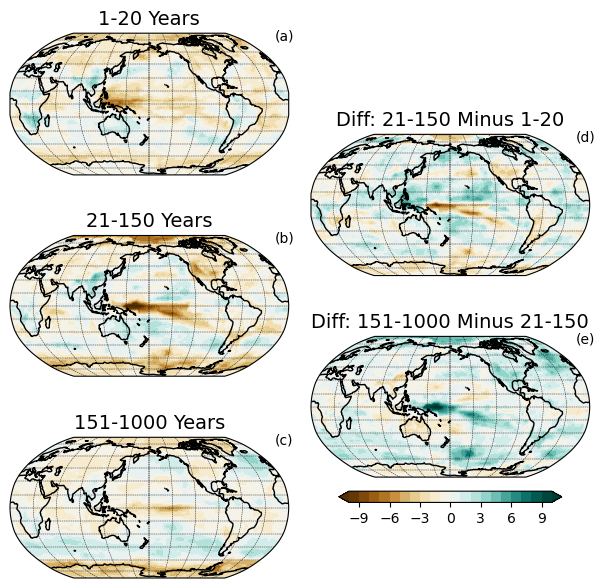

In [24]:
# Create Figs
Fig = pyplot.figure(figsize=(7.48,7.28))
Grid = pyplot.GridSpec(6, 2, wspace=0.08, hspace=0.8)
#
# Plot Contour Map of Intermodel Median Hydrological Sensitivity
for i in range(3):
    Axis = Fig.add_subplot(Grid[i*2:i*2+2,0], projection=ccrs.Robinson(central_longitude=180))
    if i == 0:
        Map_Plotting_Median("1-20 Years")
    if i == 1:
        Map_Plotting_Median("21-150 Years")
    if i == 2:
        Map_Plotting_Median("151-1000 Years")
#
# Plot Contour Map of Intermodel Median Hydrological Sensitivity Differences
for i in range(2):
    Axis = Fig.add_subplot(Grid[i*2+1:i*2+3,1], projection=ccrs.Robinson(central_longitude=180))
    if i == 0:
        Map_Plotting_Median_Diff("Diff: 21-150 Minus 1-20")
    if i == 1:
        Map_Plotting_Median_Diff("Diff: 151-1000 Minus 21-150")
Fig.savefig(var+'_maps.eps', bbox_inches='tight')

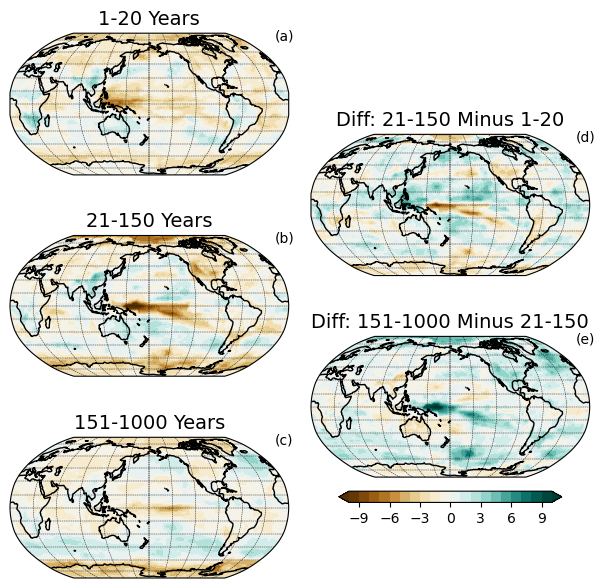

In [25]:
# Create Figs
Fig = pyplot.figure(figsize=(7.48,7.28))
Grid = pyplot.GridSpec(6, 2, wspace=0.08, hspace=0.8)
#
# Plot Contour Map of Intermodel Median Hydrological Sensitivity
for i in range(3):
    Axis = Fig.add_subplot(Grid[i*2:i*2+2,0], projection=ccrs.Robinson(central_longitude=180))
    if i == 0:
        Map_Plotting_Median("1-20 Years")
    if i == 1:
        Map_Plotting_Median("21-150 Years")
    if i == 2:
        Map_Plotting_Median("151-1000 Years")
#
# Plot Contour Map of Intermodel Median Hydrological Sensitivity Differences
for i in range(2):
    Axis = Fig.add_subplot(Grid[i*2+1:i*2+3,1], projection=ccrs.Robinson(central_longitude=180))
    if i == 0:
        Map_Plotting_Median_Diff("Diff: 21-150 Minus 1-20")
    if i == 1:
        Map_Plotting_Median_Diff("Diff: 151-1000 Minus 21-150")
Fig.savefig('figures/FIGURE_S2.eps', bbox_inches='tight')
Fig.savefig('figures/FIGURE_S2.pdf', bbox_inches='tight')
